<a href="https://colab.research.google.com/github/OnsongoMabeya/Implementation_of_descision_trees/blob/main/Week_8%2C_9%2C_10_Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree

$entropy = \sum_i p_i log_2 p_i $

In [ ]:
import numpy as np

In [ ]:
(-10/10 * np.log2(10/10))

-0.0

- for the above it is 10 ladies and 0 men
 - entropy is 0
---
- what if it was 5 ladies and 5 men

In [ ]:
(-5/10 * np.log2(5/10)) + (-5/10 * np.log2(5/10))

1.0

- then the maxumum entropy is 1

---
- entropy can be used to know who pure or impure
 - the more the entropy, the more impure it is

---
- information gain tells us how important an information is

---
-  now let us calculaate entropy in the left child

In [ ]:
(-2/6 * np.log2(2/6)) + (-4/6 * np.log2(4/6))

0.9182958340544896

---
-  now let us calculate entropy in the right child

In [ ]:
(-3/4 * np.log2(3/4)) + (-1/4 * np.log2(1/4))

0.8112781244591328

---
- gettin the weighted entropy
 - comparing with what came from parent
 - Weighted entropy of left child

In [ ]:
(6/10 * 0.9182958340544896)

0.5509775004326937

 - Weighted entropy of right child

In [ ]:
(4/10 * 0.8112781244591328)

0.32451124978365314

 - Weighted entropy of both

In [ ]:
0.5509775004326937 + 0.32451124978365314

0.8754887502163469

- minus from the parent entropy

In [ ]:
1 - 0.5509775004326937 - 0.32451124978365314

0.12451124978365319

- information gain is: 0.12451124978365319

---
- using the information of information gain, we can tell the most important gain

In [ ]:
(-2/4 * np.log2(2/4)) + (-2/4 * np.log2(2/4))

1.0

In [ ]:
# Calculate for x

In [ ]:
(-2/4 * np.log2(2/4)) + (-2/4 * np.log2(2/4)) # root

1.0

In [ ]:
(-2/3 * np.log2(2/3)) + (-1/3 * np.log2(1/3)) # left

0.9182958340544896

In [ ]:
(-1/1 * np.log2(1/1)) # right

-0.0

In [ ]:
# Calculate for y

In [ ]:
(-2/4 * np.log2(2/4)) + (-2/4 * np.log2(2/4)) # root

1.0

In [ ]:
(-2/2 * np.log2(2/2)) # left

-0.0

In [ ]:
(-2/2 * np.log2(2/2)) # right

-0.0

In [ ]:
1 - (2/4 * 0) - (2/4 * 0) # weighted entropy if split is at y

1.0

In [ ]:
# Calculate for z

In [ ]:
(-2/4 * np.log2(2/4)) + (-2/4 * np.log2(2/4)) # root

1.0

In [ ]:
(-1/2 * np.log2(1/2)) + (-1/2 * np.log2(1/2)) # left

1.0

In [ ]:
(-1/2 * np.log2(1/2)) + (-1/2 * np.log2(1/2)) # left

1.0

In [ ]:
1 - (1/2 * 1) - (1/2 * 1) # weighted entropy if split is at y

0.0

In [ ]:
# We take y as it has the hughest entropy

# Implementation of descision trees

---


In [ ]:
import pandas as pd

---
- we shall need some data

In [ ]:
data=pd.read_csv("/content/vertebrate.csv", header='infer')

In [ ]:
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,birds
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,fishes


In [ ]:
data.shape

(15, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              15 non-null     object
 1   Warm-blooded      15 non-null     int64 
 2   Gives Birth       15 non-null     int64 
 3   Aquatic Creature  15 non-null     int64 
 4   Aerial Creature   15 non-null     int64 
 5   Has Legs          15 non-null     int64 
 6   Hibernates        15 non-null     int64 
 7   Class             15 non-null     object
dtypes: int64(6), object(2)
memory usage: 1.1+ KB


---
- Now we need to make the data into binary
- We shall look at vertabrates (mammals) and non mammals

In [ ]:
data['Class'] = data['Class'].replace(['reptiles', 'fishes', 'amphibians', 'birds'], 'non-mammals')

In [ ]:
data.sample(5)

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,non-mammals
10,turtle,0,0,1,0,1,0,non-mammals
8,cat,1,1,0,0,1,0,mammals
12,porcupine,1,1,0,0,1,1,mammals


---
- mammals are warm-blooded and give birth
- let us do cross validation

In [ ]:
pd.crosstab([data['Warm-blooded'], data['Gives Birth']], data['Class'])

Class                     mammals  non-mammals
Warm-blooded Gives Birth                      
0            0                  0            7
             1                  0            1
1            0                  0            2
             1                  5            0

---
- We are now going to use descision trees
- it is in sklearn

In [ ]:
from sklearn import tree

In [ ]:
y = data['Class']

In [ ]:
y

0         mammals
1     non-mammals
2     non-mammals
3         mammals
4     non-mammals
5     non-mammals
6         mammals
7     non-mammals
8         mammals
9     non-mammals
10    non-mammals
11    non-mammals
12        mammals
13    non-mammals
14    non-mammals
Name: Class, dtype: object

In [ ]:
X = data.drop(['Name', 'Class'], axis=1)

In [ ]:
X

,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates
0,1,1,0,0,1,0
1,0,0,0,0,0,1
2,0,0,1,0,0,0
3,1,1,1,0,0,0
4,0,0,1,0,1,1
5,0,0,0,0,1,0
6,1,1,0,1,1,1
7,1,0,0,1,1,0
8,1,1,0,0,1,0
9,0,1,1,0,0,0


---
- Let us make our descision tree

In [ ]:
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [ ]:
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

---
- Now we need to train the descision tree

In [ ]:
clf = clf.fit(X, y)

In [ ]:
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

---
- We need to visualize it

In [ ]:
import pydotplus

In [ ]:
from IPython.display import Image

In [ ]:
dot_data=tree.export_graphviz(clf, feature_names=X.columns,
                              class_names=[ 'mammals', 'non-mammals'],
                              filled=True, out_file=None)

In [ ]:
dot_data

'digraph Tree {\nnode [shape=box, style="filled", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="Gives Birth <= 0.5\\nentropy = 0.918\\nsamples = 15\\nvalue = [5, 10]\\nclass = non-mammals", fillcolor="#9ccef2"] ;\n1 [label="entropy = 0.0\\nsamples = 9\\nvalue = [0, 9]\\nclass = non-mammals", fillcolor="#399de5"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Warm-blooded <= 0.5\\nentropy = 0.65\\nsamples = 6\\nvalue = [5, 1]\\nclass = mammals", fillcolor="#ea9a61"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="entropy = 0.0\\nsamples = 1\\nvalue = [0, 1]\\nclass = non-mammals", fillcolor="#399de5"] ;\n2 -> 3 ;\n4 [label="entropy = 0.0\\nsamples = 5\\nvalue = [5, 0]\\nclass = mammals", fillcolor="#e58139"] ;\n2 -> 4 ;\n}'

In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data)

In [ ]:
graph

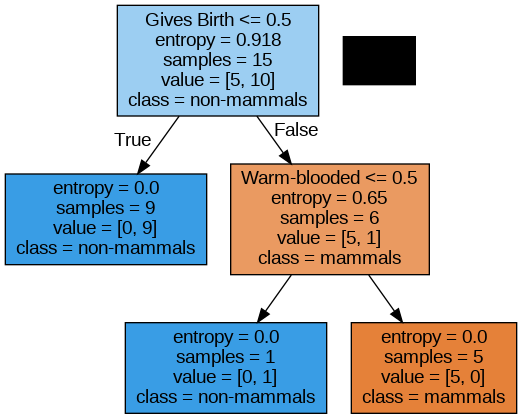

In [ ]:
graph

Image(graph.create_png())

---
- Let us create test data

In [ ]:
testData=[['gila monister', 0, 0, 0, 0, 1, 1, 'non-mammals'],
          ['platypus', 1,0,0,0, 1,1, 'mammals'],
          ['owl', 1,0,0, 1,1,0, 'non-mammals' ],
          ['dolphin', 1,1, 1,0,0,0, 'mammals' ]]

In [ ]:
testData

[['gila monister', 0, 0, 0, 0, 1, 1, 'non-mammals'],
 ['platypus', 1, 0, 0, 0, 1, 1, 'mammals'],
 ['owl', 1, 0, 0, 1, 1, 0, 'non-mammals'],
 ['dolphin', 1, 1, 1, 0, 0, 0, 'mammals']]

In [ ]:
data.columns

Index(['Name', 'Warm-blooded', 'Gives Birth', 'Aquatic Creature',
       'Aerial Creature', 'Has Legs', 'Hibernates', 'Class'],
      dtype='object')

In [ ]:
testData = pd.DataFrame(testData, columns=data.columns)

In [ ]:
testData

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,gila monister,0,0,0,0,1,1,non-mammals
1,platypus,1,0,0,0,1,1,mammals
2,owl,1,0,0,1,1,0,non-mammals
3,dolphin,1,1,1,0,0,0,mammals


---


In [ ]:
testY = testData['Class']

In [ ]:
testY

0    non-mammals
1        mammals
2    non-mammals
3        mammals
Name: Class, dtype: object

In [ ]:
testX = testData.drop(['Name', 'Class'], axis=1)

In [ ]:
testX

,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates
0,0,0,0,0,1,1
1,1,0,0,0,1,1
2,1,0,0,1,1,0
3,1,1,1,0,0,0


---
- ground truth = testy

---

In [ ]:
predY = clf.predict(testX)

In [ ]:
predY

array(['non-mammals', 'non-mammals', 'non-mammals', 'mammals'],
      dtype=object)

In [ ]:
testY

0    non-mammals
1        mammals
2    non-mammals
3        mammals
Name: Class, dtype: object

---
- model is at 75%

---
- we can make it better

In [ ]:
predictions = pd.concat([testData['Name'],
                         testData['Class'],
                         pd.Series(predY, name='Predicted Class')],
                        axis=1)

In [ ]:
predictions

,Name,Class,Predicted Class
0,gila monister,non-mammals,non-mammals
1,platypus,mammals,non-mammals
2,owl,non-mammals,non-mammals
3,dolphin,mammals,mammals


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(testY, predY) #***** (check why)#

0.75

In [ ]:
print( 'Accuracy on test data is %.2f' % (accuracy_score(testY, predY)))

Accuracy on test data is 0.75


---
- Dtree data set called animals
- make a descision tree

In [2]:
# create some syntheic data, then use the dataset for overfitting demo

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
from numpy.random import random

In [6]:
%matplotlib inline

In [22]:
N=1500

In [23]:
mean1 = [6,4]

In [24]:
mean2 = [10, 6]

In [25]:
mean3 = [14, 14]

In [26]:
cov = [[3.5,0], [0,3.5]]

In [27]:
np.random.seed(50)

In [28]:
X=np.random.multivariate_normal(mean1, cov, int(N/6))

In [29]:
X.shape

(250, 2)

In [30]:
X=np.concatenate((X,np.random.multivariate_normal(mean2,cov,int(N/6))))

In [31]:
X.shape

(500, 2)

In [32]:
X=np.concatenate((X,np.random.multivariate_normal(mean3, cov, int(N/6))))

In [33]:
X.shape

(750, 2)

In [34]:
X=np.concatenate((X,20*np.random.rand(int(N/2),2)))

In [35]:
X.shape

(1500, 2)

In [36]:
X[0]

array([3.0808485 , 3.94204621])

In [38]:
y=np.concatenate((np.ones(int(N/2)),np.zeros(int(N/2))))

In [39]:
y

array([1., 1., 1., ..., 0., 0., 0.])

In [40]:
X.shape

(1500, 2)

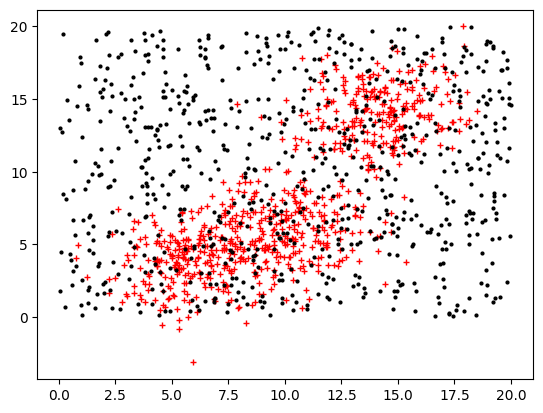

In [42]:
plt.plot(X[:int(N/2), 0], X[: int(N/2), 1], 'r+' ,X[int(N/2): ,0], X[int(N/2):, 1], 'k.', ms=4)

In [43]:
# test the model at different depths and compare their accuracies

In [44]:
maxDepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

In [45]:
len(maxDepths)

17

In [46]:
import numpy as np

In [47]:
trainAcc = np.zeros(len(maxDepths))

In [48]:
trainAcc

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [49]:
testAcc = np.zeros(len(maxDepths))

In [50]:
testAcc

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

---
 - let us make the model

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
X_train

array([[ 9.53233302,  6.05734858],
       [17.69754438, 12.806526  ],
       [15.22540054, 18.52053927],
       ...,
       [18.44768154,  0.11334469],
       [ 8.979003  ,  1.443998  ],
       [10.02550155, 11.38800524]])

In [55]:
X_test

array([[13.63430148, 16.95600373],
       [15.15102895, 12.37013284],
       [15.26309395,  8.2636963 ],
       [12.31268632,  7.08643337],
       [ 8.02704499,  4.07535982],
       [19.65803144, 18.21844062],
       [17.41813451, 15.54176752],
       [14.24558569, 12.47343734],
       [18.91018603, 18.75996198],
       [12.04902386,  8.15546836],
       [14.95530964, 16.38010471],
       [19.51876289,  1.4056844 ],
       [15.36651589, 14.74698026],
       [ 3.69546841,  8.9882004 ],
       [ 7.4666538 ,  1.72494639],
       [ 0.64480605,  6.698173  ],
       [18.06364609, 10.5241776 ],
       [14.95790184, 15.02971432],
       [ 6.40635355,  6.18897754],
       [ 5.20103427,  3.77319389],
       [ 0.97192893, 17.50532961],
       [ 1.58530147, 10.58627714],
       [ 5.9948909 ,  4.76890304],
       [ 3.87685087,  9.92178105],
       [16.12433404, 16.03699659],
       [ 9.68685926,  3.81797157],
       [19.4803404 ,  5.44112775],
       [ 9.35445085,  6.47013167],
       [ 7.34441111,

In [56]:
from sklearn import tree

In [57]:
index = 0

for depth in maxDepths:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=depth)
    clf = clf.fit(X_train, y_train)

    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)

    trainAcc[index] = accuracy_score(y_train, Y_predTrain)
    testAcc[index] = accuracy_score(y_test, Y_predTest)

    index += 1

In [58]:
trainAcc

array([0.60916667, 0.65416667, 0.67666667, 0.68833333, 0.77916667,
       0.78333333, 0.81      , 0.82833333, 0.84333333, 0.9375    ,
       0.97833333, 0.99833333, 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [59]:
testAcc

array([0.60666667, 0.66      , 0.69      , 0.68333333, 0.74333333,
       0.73666667, 0.75666667, 0.75333333, 0.74333333, 0.73666667,
       0.73      , 0.73      , 0.72      , 0.71333333, 0.73      ,
       0.70666667, 0.72333333])

In [60]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Accuracy')

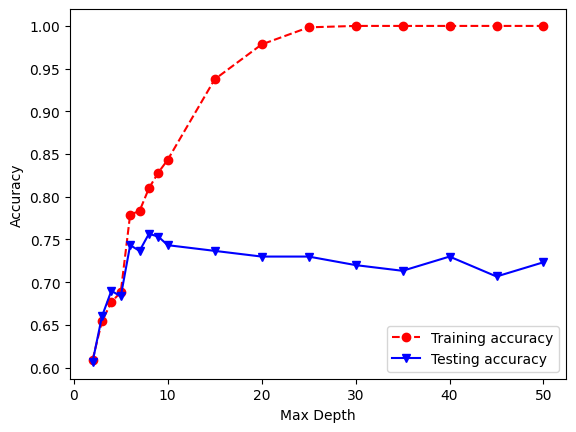

In [64]:
plt.plot(maxDepths, trainAcc, 'ro--', maxDepths, testAcc, 'bv-')
plt.legend(['Training accuracy', 'Testing accuracy'])
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')

In [62]:
testAcc.max()

0.7566666666666667

---
- why is it that in model building, Test Accuracy is the most important, not the training accuracy??

In [ ]:
# logistic regression
# descision trees
# record on weights and biases